In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [3]:
df_orig = df.copy()


In [4]:
df.loc[0:5, 'bmi'] = np.nan
df.loc[10:12, 'bp'] = np.nan
print("🔹 Missing values before filling:\n", df.isnull().sum())

🔹 Missing values before filling:
 age       0
sex       0
bmi       6
bp        3
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [5]:
df.fillna(df.median(numeric_only=True), inplace=True)
print("🔹 After imputation:\n", df.isnull().sum())


🔹 After imputation:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [7]:
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

df_minmax = df.copy()
df_standard = df.copy()

df_minmax[diabetes.feature_names] = scaler_minmax.fit_transform(df[diabetes.feature_names])
df_standard[diabetes.feature_names] = scaler_standard.fit_transform(df[diabetes.feature_names])

In [8]:
df['bmi_bin'] = pd.cut(df['bmi'], bins=3, labels=["Low", "Medium", "High"])


In [9]:
df['age_bmi'] = df['age'] * df['bmi']
df['bp_hdl'] = df['bp'] * df['s5']

In [10]:
X = df[diabetes.feature_names]
y = df['target']
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("🔹 Top 5 features selected:", selected_features.tolist())

🔹 Top 5 features selected: ['bmi', 'bp', 's3', 's4', 's5']


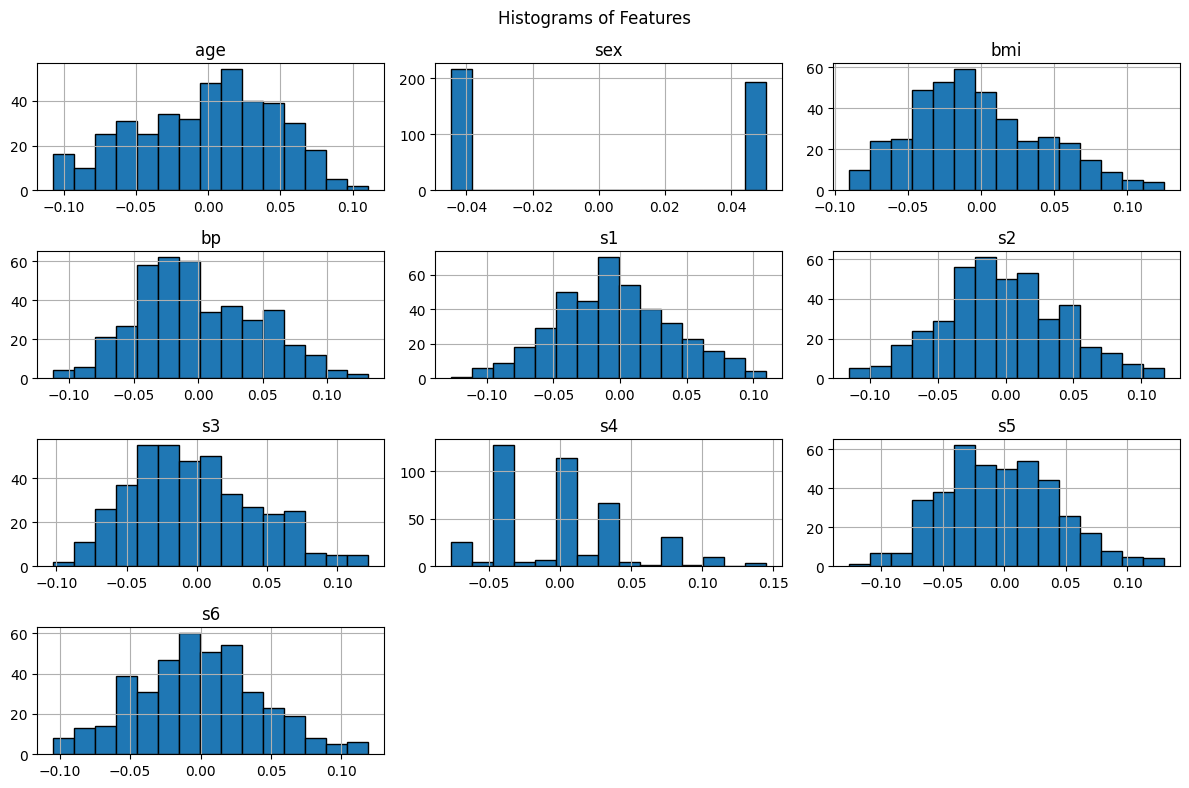

In [11]:
df[diabetes.feature_names].hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle("Histograms of Features")
plt.tight_layout()
plt.show()


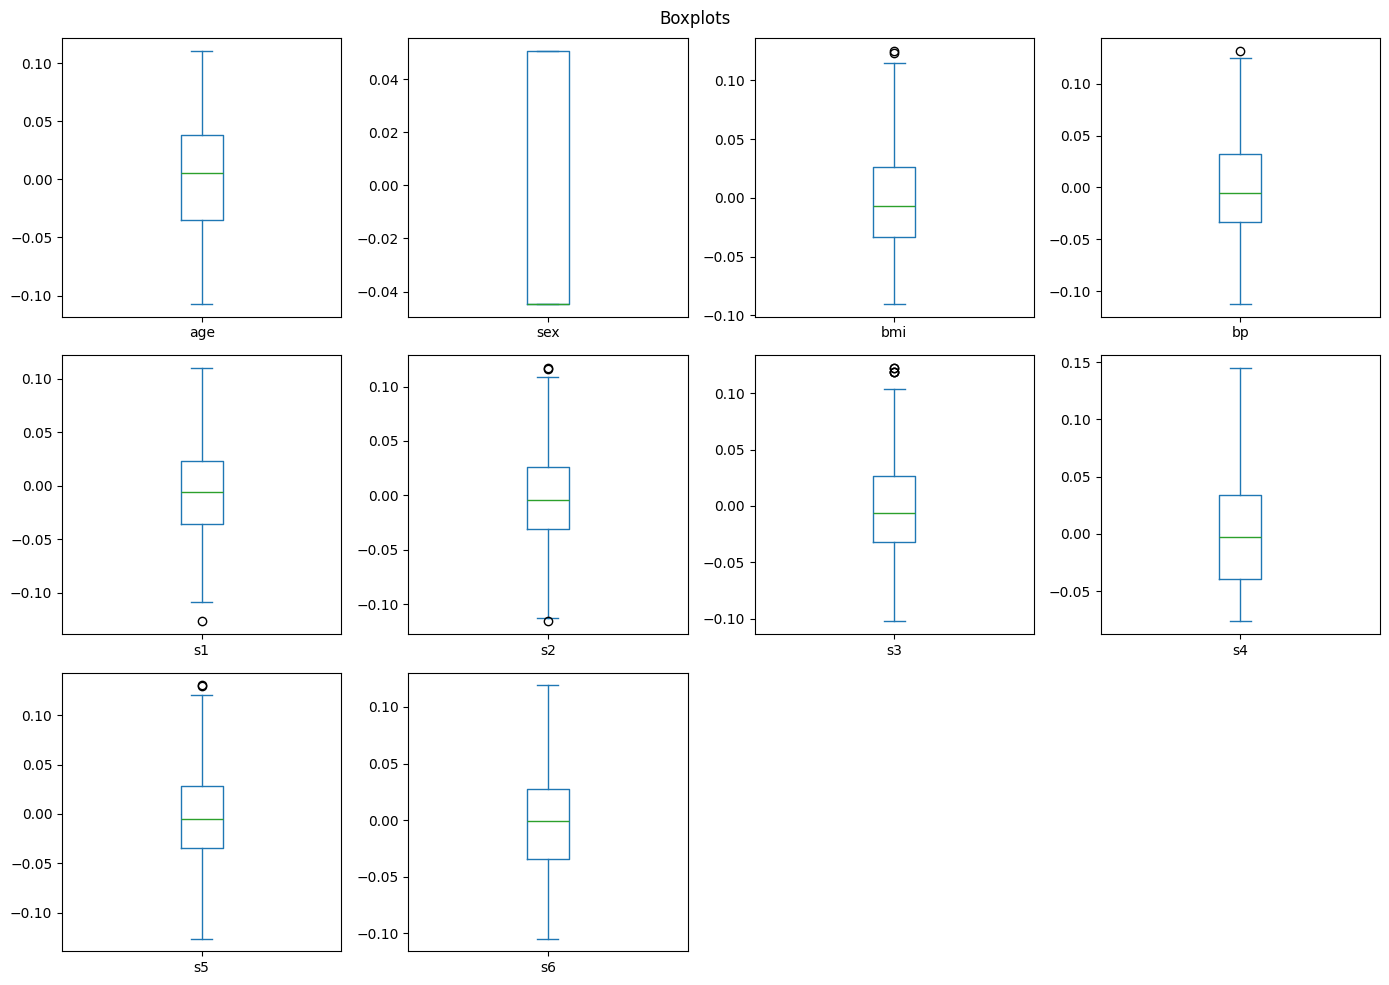

In [12]:
df[diabetes.feature_names].plot(kind='box', subplots=True, layout=(3, 4), figsize=(14, 10), title="Boxplots")
plt.tight_layout()
plt.show()

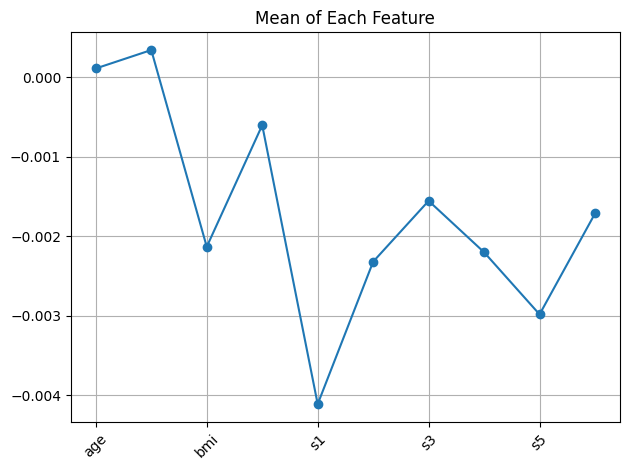

In [13]:
means = df[diabetes.feature_names].mean()
means.plot(kind='line', marker='o')
plt.title("Mean of Each Feature")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

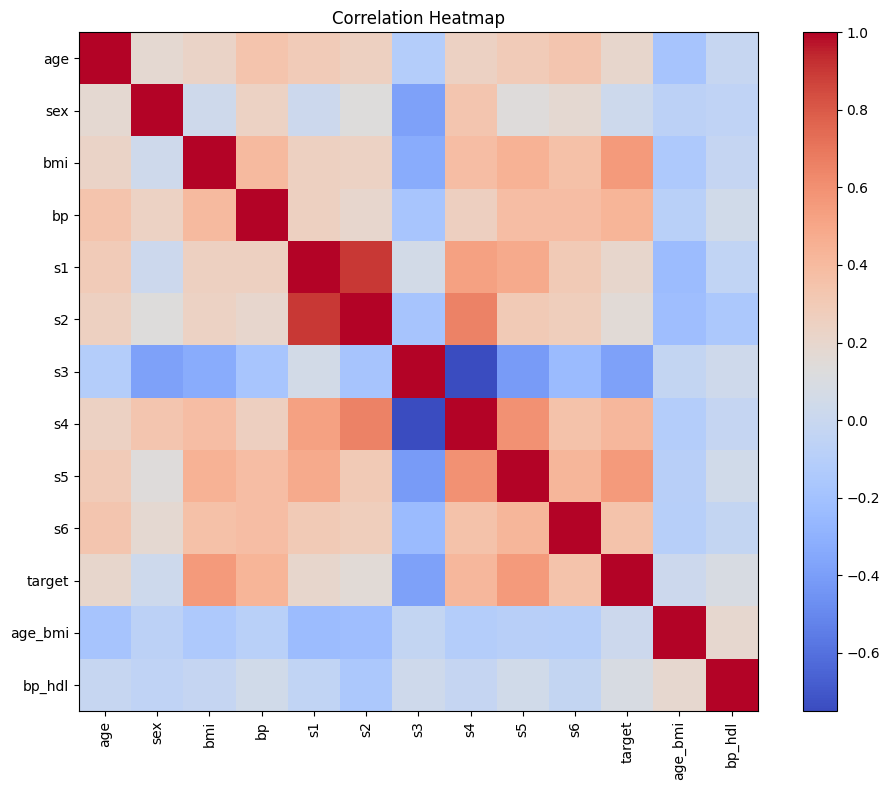

In [14]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

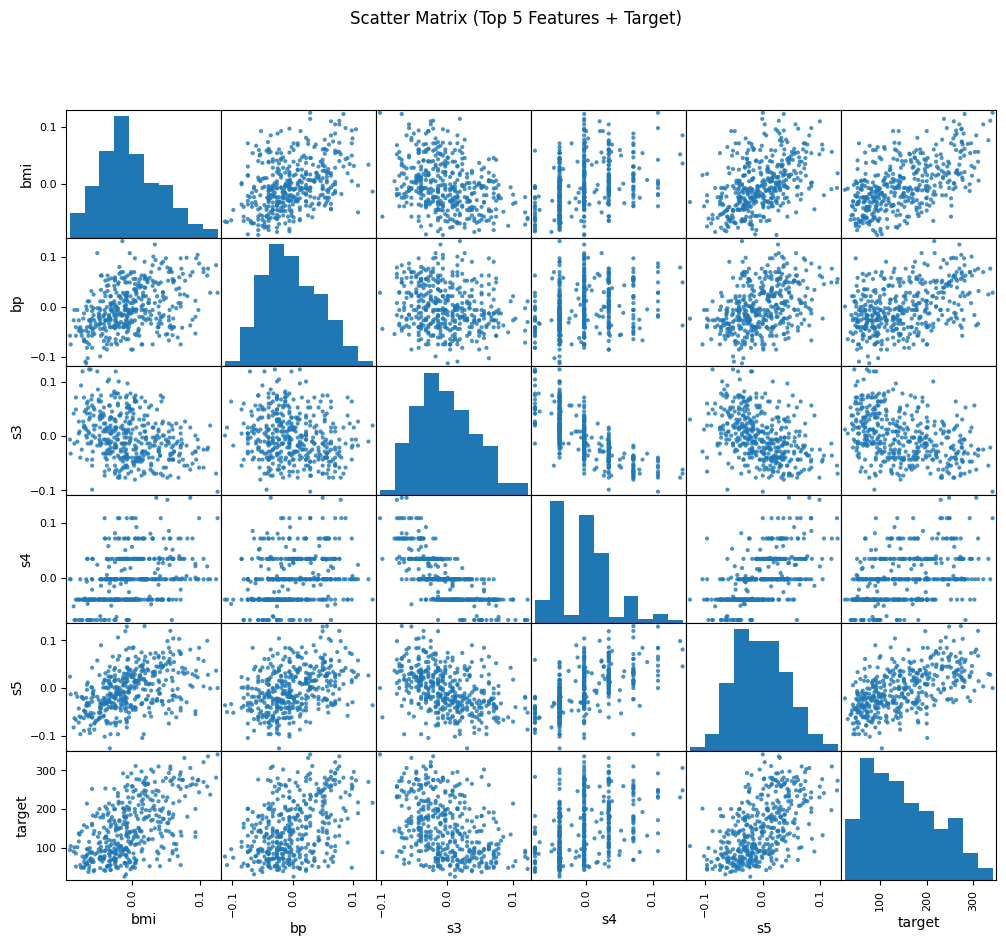

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[selected_features.tolist() + ['target']], figsize=(12, 10), alpha=0.8, diagonal='hist')
plt.suptitle("Scatter Matrix (Top 5 Features + Target)")
plt.show()

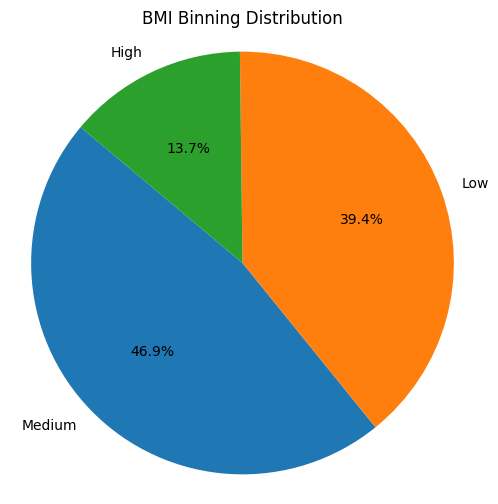

In [16]:
plt.figure(figsize=(6, 6))
df['bmi_bin'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("BMI Binning Distribution")
plt.ylabel("")
plt.axis('equal')
plt.show()

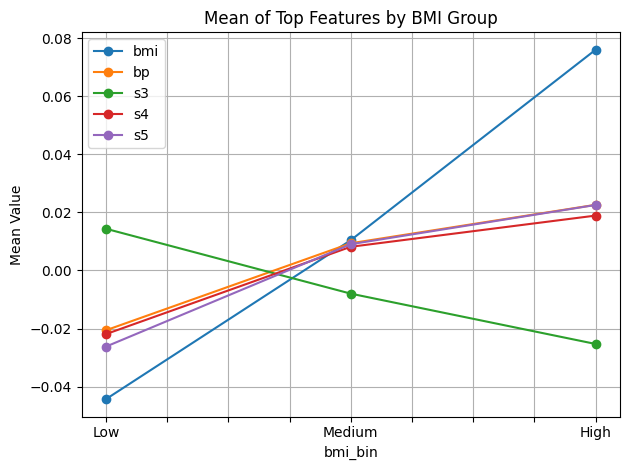

In [18]:
mean_grouped = df.groupby('bmi_bin', observed=True)[selected_features].mean()
mean_grouped.plot(kind='line', marker='o')
plt.title("Mean of Top Features by BMI Group")
plt.ylabel("Mean Value")
plt.grid(True)
plt.tight_layout()
plt.show()

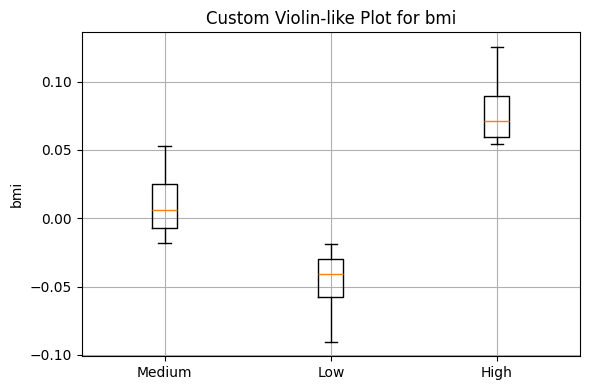

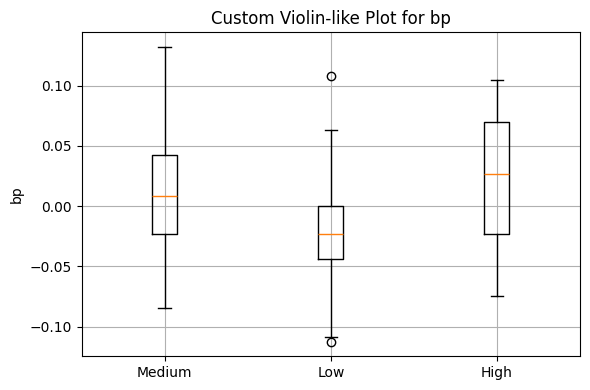

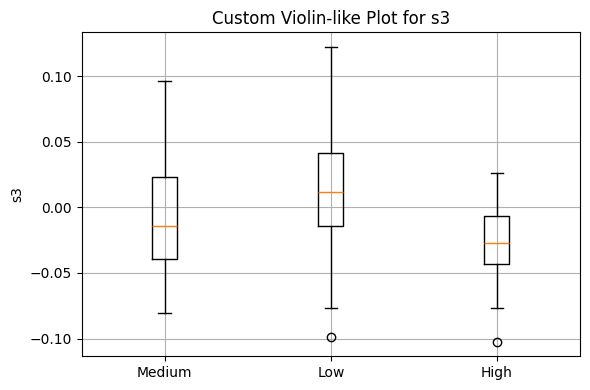

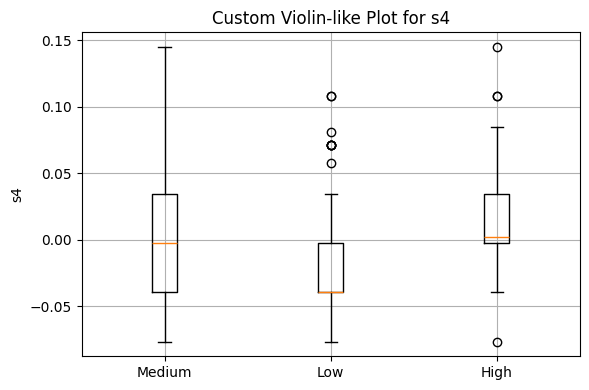

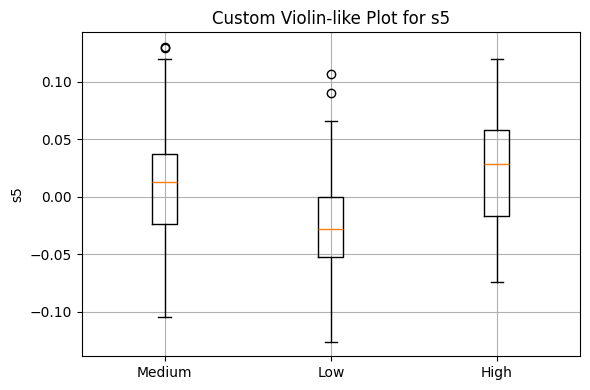

In [19]:
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    for i, group in enumerate(df['bmi_bin'].dropna().unique()):
        data = df[df['bmi_bin'] == group][feature]
        plt.boxplot(data, positions=[i])
    plt.xticks(range(len(df['bmi_bin'].dropna().unique())), df['bmi_bin'].dropna().unique())
    plt.title(f"Custom Violin-like Plot for {feature}")
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [22]:
# Skewness and Kurtosis
skewness = df[diabetes.feature_names].skew()
kurtosis = df[diabetes.feature_names].kurt()

print("🔹 Skewness:\n", skewness)
print("🔹 Kurtosis:\n", kurtosis)


🔹 Skewness:
 age   -0.255916
sex    0.113063
bmi    0.454400
bp     0.308706
s1     0.126606
s2     0.093401
s3     0.419665
s4     0.671554
s5     0.236942
s6     0.143236
dtype: float64
🔹 Kurtosis:
 age   -0.674778
sex   -1.997006
bmi   -0.305152
bp    -0.478878
s1    -0.232286
s2    -0.213673
s3    -0.254227
s4     0.249596
s5    -0.190126
s6    -0.228353
dtype: float64


In [24]:
df_log = df.copy()
for col in diabetes.feature_names:
    df_log[col] = np.log1p(df_log[col] - df_log[col].min() + 1)  # to handle negative values


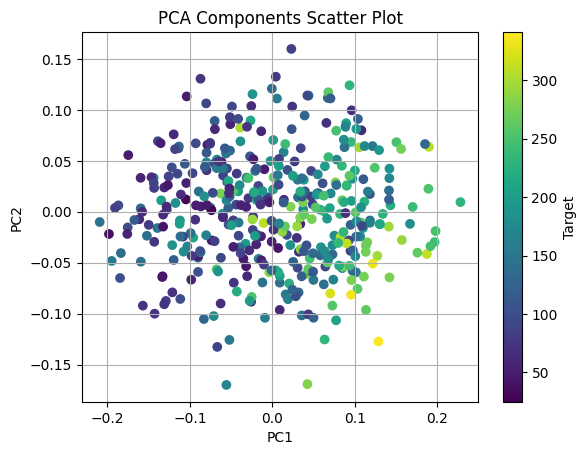

🔹 Polynomial Features Shape: (409, 65)


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=y, cmap='viridis')
plt.title("PCA Components Scatter Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Target')
plt.grid(True)
plt.show()
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
print("🔹 Polynomial Features Shape:", X_poly.shape)


In [31]:
df['s1_s2_interaction'] = df['s1'] * df['s2']
df['log_age'] = np.log1p(df['age'] - df['age'].min() + 1)
le = LabelEncoder()
df['bmi_bin_encoded'] = le.fit_transform(df['bmi_bin'])
print("🔹 BMI bin encoding:\n", df[['bmi_bin', 'bmi_bin_encoded']].drop_duplicates())


🔹 BMI bin encoding:
   bmi_bin  bmi_bin_encoded
0  Medium                2
6     Low                1
8    High                0


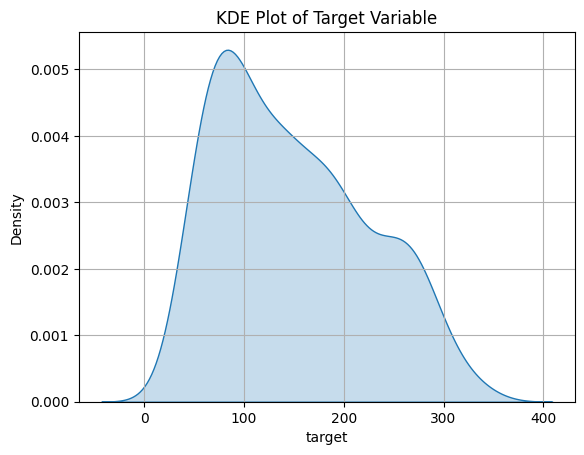

In [34]:
import seaborn as sns
sns.kdeplot(df['target'], fill=True)
plt.title("KDE Plot of Target Variable")
plt.grid(True)
plt.show()


In [33]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


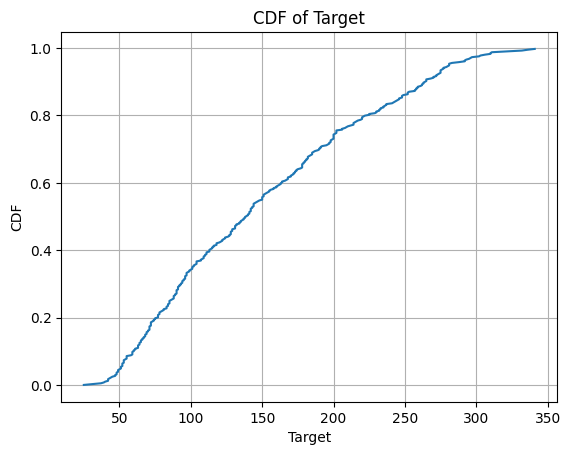

In [35]:
sorted_target = np.sort(df['target'])
cdf = np.arange(len(sorted_target)) / float(len(sorted_target))
plt.plot(sorted_target, cdf)
plt.title("CDF of Target")
plt.xlabel("Target")
plt.ylabel("CDF")
plt.grid(True)
plt.show()
